# Проверка гипотез по увеличению выручки в интернет-магазине (А/В тест)

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Содержание:
* [Шаг 1. Приоритизация гипотез](#1-bullet)
* 1.1. [Фреймворк ICE для приоритизации гипотез](#1-1-bullet)
* 1.2. [Фреймворк RICE для приоритизации гипотез](#1-2-bullet)
* 1.3. [Различия в результатах при применении RICE и ICE](#1-3-bullet)
* [Шаг 2. Анализ A/B-теста](#2-bullet)
* 2.1. [График кумулятивной выручки по группам](#2-1-bullet)
* 2.2. [График кумулятивного среднего чека по группам](#2-2-bullet)
* 2.3. [График относительного изменения кумулятивного среднего чека группы B к группе A](#2-3-bullet)
* 2.4. [График кумулятивной конверсии по группам](#2-4-bullet)
* 2.5. [График относительного изменения кумулятивной конверсии группы B к группе A](#2-5-bullet)
* 2.6. [График количества заказов по пользователям](#2-6-bullet)
* 2.7. [95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей](#2-7-bullet)
* 2.8. [График стоимостей заказов](#2-8-bullet)
* 2.9. [95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов](#2-9-bullet)
* 2.10.[Статистическая значимость различий в конверсии между группами по «сырым» данным](#2-10-bullet)
* 2.11.[Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#2-11-bullet)
* 2.12.[Cтатистическая значимость различий в конверсии между группами по «очищенным» данным](#2-12-bullet)
* 2.13.[Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#2-13-bullet)
* [Шаг 3. Решение по результатам А/В теста](#3-bullet)

## Шаг 1. Приоритизация гипотез<a class="anchor" id="1-bullet"></a>

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats

In [2]:
df_hypothesis = pd.read_csv('/datasets/hypothesis.csv')
df_hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


**Таблица hypothesis** 

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [3]:
df_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
df_hypothesis.duplicated().sum()

0

    В таблице нет пропущенных значений, нет дубликатов, нет типов данных, которые необходимо
    изменять. Необходимо привести названия колонок к нижнему регистру.

In [5]:
df_hypothesis.columns = df_hypothesis.columns.str.lower()
df_hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [6]:
df_hypothesis['hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

    В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина
    с указанными параметрами Reach, Impact, Confidence, Effort.

### Задача 1.1.<a class="anchor" id="1-1-bullet"></a>
**Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета**

In [7]:
pd.set_option('max_colwidth', 120)

In [8]:
df_hypothesis['ICE'] = df_hypothesis['impact']*df_hypothesis['confidence']/df_hypothesis['efforts']
               
df_hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False).round(1) 

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


    Фреймворк ICE состоит из трех компонентов:
    Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение
    от продукта;
    Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
    Efforts — сколько стоит протестировать эту гипотезу.

    По Фреймворку ICE определены ТОП-3 гипотез:
    1. Запустить акцию, дающую скидку на товар в день рождения - 16,2
    2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше
    пользователей - 13,3
    3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для
    email-рассылок - 11.2

### Задача 1.2.<a class="anchor" id="1-2-bullet"></a>
**Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

In [9]:
df_hypothesis['RICE'] = df_hypothesis['reach']*df_hypothesis['impact']*df_hypothesis['confidence']/df_hypothesis['efforts']
df_hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


    Фреймворк RICE состоит из четырёх компонент:
    Reach — скольких пользователей затронет изменение, которое вы хотите внести;
    Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение
    от продукта;
    Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
    Efforts — сколько стоит протестировать эту гипотезу.

    По Фреймворк RICE определены ТОП-3 гипотез:
    1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для
    email-рассылок - 112.0
    2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию
    и средний чек заказа - 56.0
    3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30%
    больше пользователей - 40


### Задача 1.3. <a class="anchor" id="1-3-bullet"></a>
**Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.**

    Во Фреймворке RICE учитывается показатель Reach — скольких пользователей затронет изменение.
    
    Если сравнивать оба результата:
    1. При учете показателя Reach из ТОП-3 гипотез ушла гипотеза "Запустить акцию, дающую скидку
    на товар в день рождения", так как изменения затрагивают небольшую аудиторию.
    2. При учете показателя Reach гипотеза "Добавить форму подписки на все основные страницы,
    чтобы собрать базу клиентов для email-рассылок" с 3-его места переместилась на первое, так
    как изменения затронут максимальное количество пользователей.

## Шаг 2. Анализ A/B-теста <a class="anchor" id="2-bullet"></a>

### Предобработка данных 

In [10]:
df_orders = pd.read_csv('/datasets/orders.csv')

In [11]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


***Таблица orders***

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

In [12]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
df_orders['transactionId'].duplicated().sum()

0

In [14]:
df_orders.duplicated().sum()

0

   
    В таблице нет пропущенных значений, нет дубликатов.    
    В колонке ['date'] необходимо изменить тип данных на datetime.

In [15]:
df_orders['date'] = pd.to_datetime(df_orders['date'])

In [16]:
df_orders.dtypes

transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object

In [17]:
df_orders['group'].unique()

array(['B', 'A'], dtype=object)

    В таблице orders две уникальные группы А/В теста

In [18]:
df_visitors = pd.read_csv('/datasets/visitors.csv')
df_visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


***Таблица visitors***

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [19]:
df_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [20]:
df_visitors.duplicated().sum()

0

    В таблице нет пропущенных значений, нет дубликатов.    
    В колонке ['date'] необходимо изменить тип данных на datetime.

In [21]:
df_visitors['date'] = pd.to_datetime(df_visitors['date'])

In [22]:
df_visitors.dtypes

date        datetime64[ns]
group               object
visitors             int64
dtype: object

In [23]:
df_visitors['group'].unique()

array(['A', 'B'], dtype=object)

    В таблице visitors две уникальные группы А/В теста

### Задача 2.1. Постройте график кумулятивной выручки по группам. <a class="anchor" id="2-1-bullet"></a>

In [24]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = df_orders[['date','group']].drop_duplicates()

In [25]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [26]:
ordersAggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

In [27]:
ordersAggregated.head()

,date,group,orders,buyers,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Text(0.5, 0, 'дата заказа')

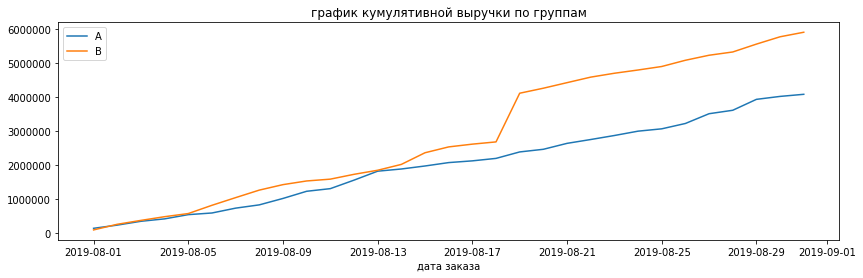

In [28]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cummulativeRevenueA = ordersAggregated[ordersAggregated['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cummulativeRevenueB = ordersAggregated[ordersAggregated['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(14,4))
# Строим график выручки группы А
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('график кумулятивной выручки по группам')
plt.xlabel("дата заказа")

    Выручка почти равномерно увеличивается в течение всего теста.
    Однако график выручки группы "В" в нескольких точках резко растет (промежуток с 
    2019-08-17 по 2019-08-21). Это может сигнализировать о всплесках числа заказов, либо
    о появлении очень дорогих заказов в выборке. Такие выбросы необходимо дополнительно
    проанализировать.
    
    По данному графику выручка группы В значительно выше выручки в группе А.

### Задача 2.2. Постройте график кумулятивного среднего чека по группам<a class="anchor" id="2-2-bullet"></a>

Text(0.5, 0, 'дата заказа')

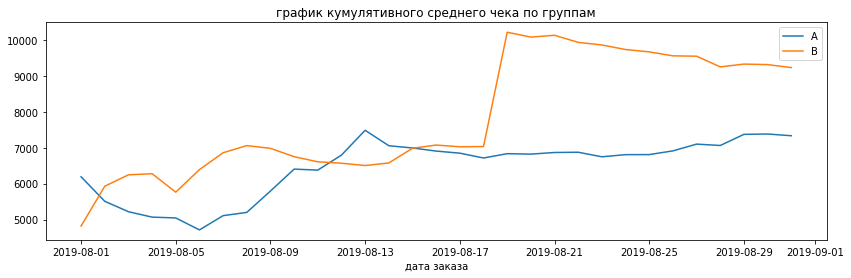

In [29]:
plt.figure(figsize=(14,4))
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('график кумулятивного среднего чека по группам')
plt.xlabel("дата заказа")

    В начале теста средний чек в группе "А" был выше, чем в группе "B".
    Далее в группе А идет падение, а в группе В рост.
    
    На обоих графиках есть всплески, резкий рост среднего чека.
    Возможно, в группы попали крупные заказы (резкий всплеск на графике). 
    Средний чек становится равномерным ближе к середине теста: начиная с 2019-08-17
    средний чек группы В значительно выше среднего чека группы А.

### Задача 2.3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A<a class="anchor" id="2-3-bullet"></a>

Text(0.5, 0, 'дата заказа')

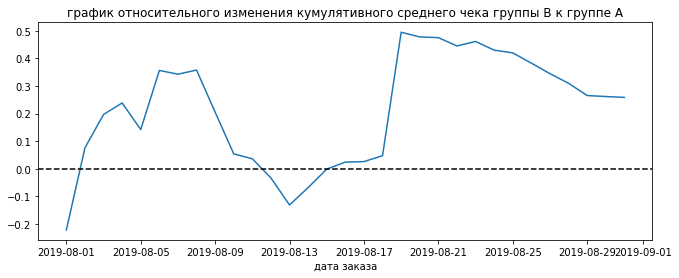

In [30]:
# собираем данные в одном датафрейме
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(11,4))
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('график относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel("дата заказа")

    В начале теста средний чек в группе "B" был ниже, чем в группе "А". Затем мы видим рост,
    падение и опять рост. После этого вторую половину теста - средний чек группы "В" был
    значительно выше среднего чека группы "А". В нескольких точках графика различия между 
    сегментами резко «скачут». Это говорит о том, что в данных есть крупные заказы и выбросы.

### Задача 2.4. Постройте график кумулятивной конверсии по группам.<a class="anchor" id="2-4-bullet"></a>

In [31]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: df_visitors[np.logical_and(df_visitors['date'] <= x['date'], df_visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


In [32]:
cummulativeData.head()


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Text(0.5, 0, 'дата')

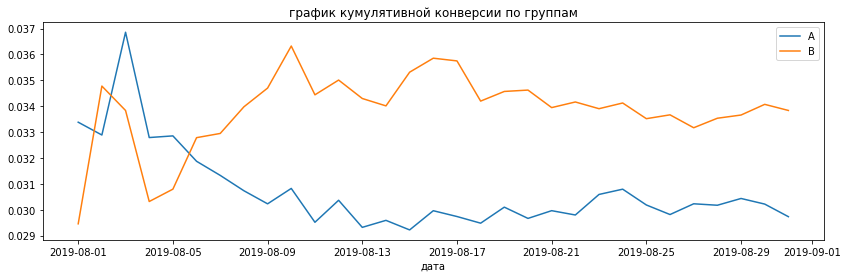

In [33]:
# считаем кумулятивную конверсию
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

# отделяем данные по группе A
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']

# отделяем данные по группе B
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

# строим графики
plt.figure(figsize=(14,4))
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.legend()
plt.title('график кумулятивной конверсии по группам')
plt.xlabel("дата")

    В начале теста группы колебались, но затем конверсия группы В вырвалась вперёд и
    зафиксировалась, а конверсия группы А просела и также зафиксировалась. 

### Задача 2.5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A.<a class="anchor" id="2-5-bullet"></a>

Text(0.5, 0, 'дата')

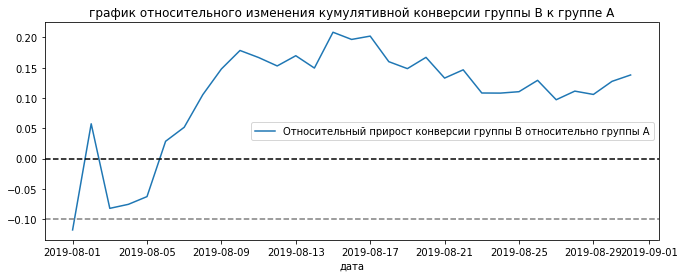

In [34]:
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(11,4))
plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('график относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel("дата")

    В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд.
    В целом можно сказать, что отношение конверсии уже установилось. Впрочем, сперва стоит 
    проанализировать аномалии, возможно, они изменят картину.

### Задача 2.6. Постройте точечный график количества заказов по пользователям<a class="anchor" id="2-6-bullet"></a>

In [35]:
ordersByUsers = df_orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['userId','orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head(5))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5


In [36]:
ordersByUsers['orders'].unique()

array([ 1,  2,  5,  3,  4,  8,  9, 11])

    Есть пользователи, которые совершали 5, 8, 9 и 11 заказов.
    Значительно больше, чем обычный пользователь за неделю.
    Построим гистрограмму распределения количества заказов на одного пользователя

Text(0.5, 1.0, 'количество заказов на 1 пользователя')

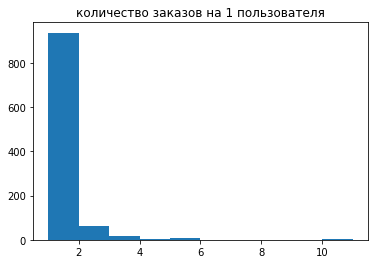

In [37]:
plt.hist(ordersByUsers['orders'])
plt.title('количество заказов на 1 пользователя')

    Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3
    заказами тоже значительна.
    Построим точечную диаграмму числа заказов на одного пользователя:

Text(0.5, 1.0, 'количество заказов на 1 пользователя')

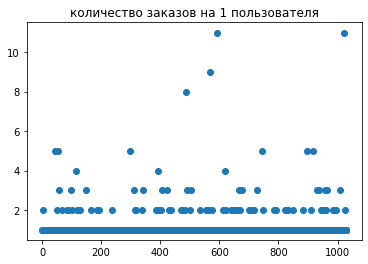

In [38]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('количество заказов на 1 пользователя')

   
    Выводы подтверждаются: много пользователей с 2-3 заказами. Их точная доля не ясна — 
    непонятно, считать их аномалиями или нет.

### Задача 2.7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя.           Выберите границу для определения аномальных пользователей.<a class="anchor" id="2-7-bullet"></a>

In [39]:
np.percentile(ordersByUsers['orders'], [90, 95, 97, 98, 99])

array([1., 2., 2., 3., 4.])

    Не более 5% пользователей оформляли больше, чем 2 заказов. 
    Выберем 3 заказа на одного пользователя за нижнюю границу числа заказов (98-ой процентиль),
    и отсеем аномальных пользователей по ней. 

### Задача 2.8. Постройте точечный график стоимостей заказов<a class="anchor" id="2-8-bullet"></a>

Text(0.5, 1.0, 'график стоимостей заказов')

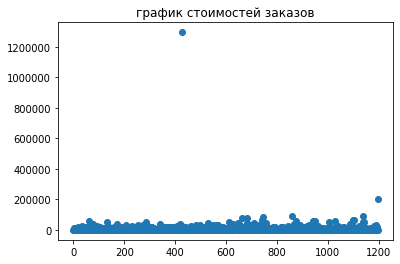

In [40]:
x_values = pd.Series(range(0,len(df_orders['revenue'])))
plt.scatter(x_values, df_orders['revenue'])
plt.title('график стоимостей заказов')

    На графике видим два выброса, анамально дорогие заказы.
    1 заказ стоимостью свыше 1 200 000 руб может сильно испортить данные.
    Приблизим график, чтобы подробнее изучить распределение заказов.

(0, 60000)

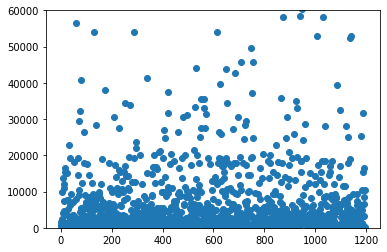

In [41]:
x_values = pd.Series(range(0,len(df_orders['revenue'])))
plt.scatter(x_values, df_orders['revenue'])
plt.ylim(0, 60000)

    Видим, что количество заказов свыше 30 000 руб. очень мало.

### Задача 2.9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.<a class="anchor" id="2-9-bullet"></a>

In [42]:
np.percentile(df_orders['revenue'], [90, 95, 96, 97, 98, 99])

array([18168. , 28000. , 31382. , 35485. , 44133.2, 58233.2])

    Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58233 рублей.
    Возьмем 30 000 руб за нижнюю границу стоимости заказов (96-ой процентиль), и отсеем
    аномальных пользователей по ней. 

### Задача 2.10. Статистическая значимость различий в конверсии между группами по «сырым» данным.<a class="anchor" id="2-10-bullet"></a>

In [43]:
visitorsADaily = df_visitors[df_visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = df_visitors[df_visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [44]:
ordersADaily = df_orders[df_orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'visitorId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = df_orders[df_orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [45]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')


**Посчитаем статистическую значимость различия в конверсии между группами.**

In [46]:
ordersByUsersA = df_orders[df_orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = df_orders[df_orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [47]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [48]:
ordersByUsersA = df_orders[df_orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = df_orders[df_orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [49]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


**Вывод:**

    По «сырым» данным различия в конверсии групп A и B есть.
    Первое число — p-value = 0.008 меньше 0.05. Значит, нулевая гипотеза о том, что 
    статистически значимых различий в конверсии между группами нет, не подтвердилась.
    По "сырым данным" относительный выигрыш группы B равен 13.8% — второе число в выводе. 

### Задача 2.11. Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. <a class="anchor" id="2-11-bullet"></a>

    Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами,
    передадим критерию mannwhitneyu() данные о выручке с заказов.
    А ещё найдём относительные различия в среднем чеке между группами:

In [50]:
print("{0:.3f}".format(stats.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


    P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать,
    что в среднем чеке есть различия, нет. Хотя, средний чек группы B значительно выше среднего
    чека группы A (на 25,9%).

### Задача 2.12. Cтатистическая значимость различий в конверсии между группами по «очищенным» данным.<a class="anchor" id="2-12-bullet"></a>

    В заданиях выше были  найденны 95-й и 99-й перцентили средних чеков и они равны
    28 000 и 58 233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя
    равны 2 и 4 заказа на пользователя.
    
    Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже
    30 000 рублей.
    Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей,
    совершивших заказы дороже 30 000 — usersWithExpensiveOrders.
    Объединим их в таблице abnormalUsers.
    Узнаем, сколько всего аномальных пользователей методом shape(). 

In [51]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 3]['userId']], axis = 0)
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 30000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64
(57,)


    Всего 57  аномальных пользователей.
    Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным
    данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [52]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [53]:
#Применим статистический критерий Манна-Уитни к полученным выборкам:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.009
0.148


    Результаты по конверсии практически не изменились. 

**Вывод:**

    По «очищенным» данным различия в конверсии групп A и B есть.
    Первое число — p-value = 0.009 меньше 0.05.
    Значит, нулевая гипотеза о том, что статистически значимых различий в конверсии между
    группами нет, не подтвердилась.
    По "очищенным данным" относительный выигрыш группы B равен 14,8%

### Задача 2.13. Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным<a class="anchor" id="2-13-bullet"></a>

In [54]:
print("{0:.3f}".format(stats.mannwhitneyu(
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    df_orders[np.logical_and(
        df_orders['group']=='B',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

0.479


In [55]:
print("{0:.3f}".format(
    df_orders[np.logical_and(df_orders['group']=='B',np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    df_orders[np.logical_and(df_orders['group']=='A',np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

-0.020


    Первое число — p-value = 0.479 больше 0.05.
    Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.
    Средний чек группы B стал ниже среднего чека группы A на 2%. По неочищенным данным  средний
    чек группы B был значительно выше среднего чека группы A (на 25,9%). 

### Шаг 3. Примите решение по результатам теста и объясните его. <a class="anchor" id="3-bullet"></a>

    -по конверсии между группами A и B (как по сырым данным, так и по очищенным) есть
    статистически значимые различия;
    
    -по среднему чеку между группами A и B (как по сырым данным, так и по очищенным) нет
    статистически значимых различий.


    Данный тест можно остановить и считать успешно проведенным. Конверсия из пользователя в 
    покупателя у группы B статистически значимо выше, чем у группы A. При этом средний чек между
    группами не отличается.
